In [2]:
import pandas as pd
import requests
import urllib.parse as urlparse
import datetime

In [3]:
start = "37.77493,-122.419415"               # San Francisco
end = "34.052234,-118.243685"                # Los Angeles
key = "<TYPE_YOUR_KEY_HERE>"                 # API Key

# Base URL
base_url = "https://api.tomtom.com/routing/1/calculateRoute/"

In [5]:
today = datetime.date.today()
departure_time_start = datetime.datetime(today.year, today.month, today.day-1, 0, 0, 0)

hour_range = range(0,24)

for i in hour_range:
    # Update an hour
    departure_time = departure_time_start.replace(hour=departure_time_start.hour + i)
    
    # Format datetime string
    departure_time = departure_time.strftime('%Y-%m-%dT%H:%M:%S')    

    # Create request URL
    request_params = (
        urlparse.quote(start) + ":" + urlparse.quote(end) 
        + "/json?departAt=" + urlparse.quote(departure_time))

    request_url = base_url + request_params + "&key=" + key

    # Get data
    response = requests.get(request_url)

    # Convert to JSON
    json_result = response.json()

    # Get summary
    route_summary = json_result['routes'][0]['summary']
    
    # Convert to data frame and append
    if(i == 0):
        df = pd.json_normalize(route_summary)
    else:
        df = df.append(pd.json_normalize(route_summary), ignore_index=True)    
        
    print(f"Retrieving data: {i+1} / {len(hour_range)}")
    

Retrieving data: 1 / 24
Retrieving data: 2 / 24
Retrieving data: 3 / 24
Retrieving data: 4 / 24
Retrieving data: 5 / 24
Retrieving data: 6 / 24
Retrieving data: 7 / 24
Retrieving data: 8 / 24
Retrieving data: 9 / 24
Retrieving data: 10 / 24
Retrieving data: 11 / 24
Retrieving data: 12 / 24
Retrieving data: 13 / 24
Retrieving data: 14 / 24
Retrieving data: 15 / 24
Retrieving data: 16 / 24
Retrieving data: 17 / 24
Retrieving data: 18 / 24
Retrieving data: 19 / 24
Retrieving data: 20 / 24
Retrieving data: 21 / 24
Retrieving data: 22 / 24
Retrieving data: 23 / 24
Retrieving data: 24 / 24


In [6]:
df

,lengthInMeters,travelTimeInSeconds,trafficDelayInSeconds,trafficLengthInMeters,departureTime,arrivalTime
0,657076,21017,0,0,2021-11-23T00:00:00-08:00,2021-11-23T05:50:16-08:00
1,656817,21232,0,0,2021-11-23T01:00:00-08:00,2021-11-23T06:53:51-08:00
2,656818,21920,0,0,2021-11-23T02:00:00-08:00,2021-11-23T08:05:19-08:00
3,658645,21873,0,0,2021-11-23T03:00:00-08:00,2021-11-23T09:04:32-08:00
4,658645,21768,0,0,2021-11-23T04:00:00-08:00,2021-11-23T10:02:48-08:00
5,615647,19453,0,0,2021-11-23T05:00:00-08:00,2021-11-23T10:24:13-08:00
6,616300,19545,0,0,2021-11-23T06:00:00-08:00,2021-11-23T11:25:44-08:00
7,615423,19774,0,0,2021-11-23T07:00:00-08:00,2021-11-23T12:29:33-08:00
8,620229,19872,0,0,2021-11-23T08:00:00-08:00,2021-11-23T13:31:11-08:00
9,620229,19922,0,0,2021-11-23T09:00:00-08:00,2021-11-23T14:32:02-08:00


In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Travel time [h]')

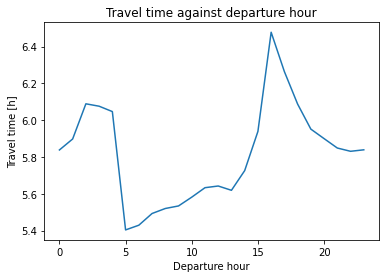

In [9]:
plt.plot(df['travelTimeInSeconds']/3600)
plt.title('Travel time against departure hour')
plt.xlabel('Departure hour')
plt.ylabel('Travel time [h]')

Text(0, 0.5, 'Travel distance [km]')

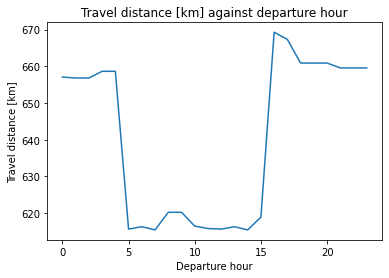

In [10]:
plt.plot(df['lengthInMeters']/1000)
plt.title('Travel distance [km] against departure hour')
plt.xlabel('Departure hour')
plt.ylabel('Travel distance [km]')

Text(0, 0.5, 'Distance [km]')

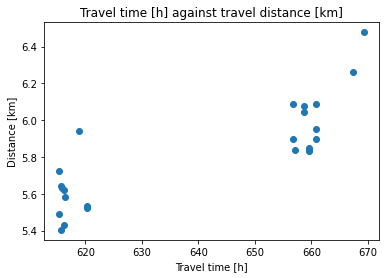

In [13]:
plt.scatter(df['lengthInMeters']/1000, df['travelTimeInSeconds']/3600)
plt.title('Travel time [h] against travel distance [km]')
plt.xlabel('Travel time [h]')
plt.ylabel('Distance [km]')

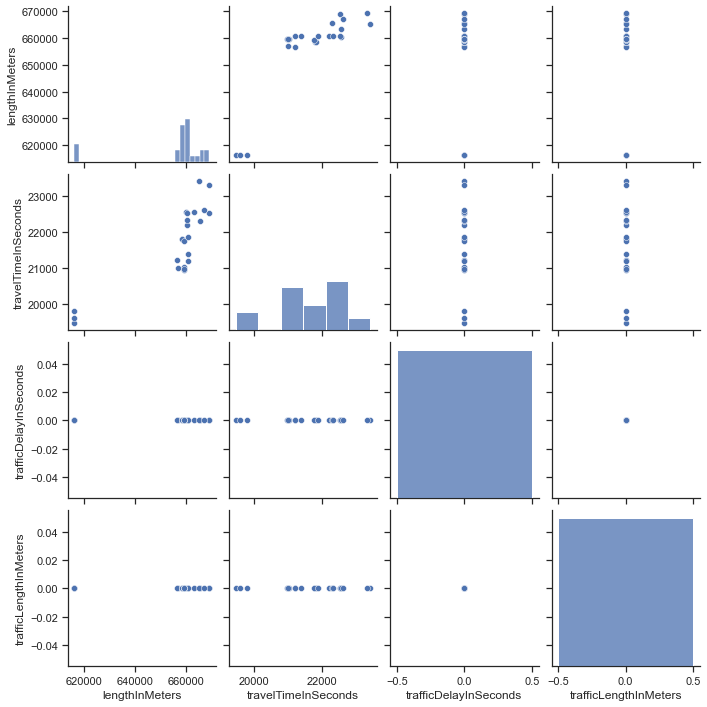

In [10]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df)